# Albero decisionale

### Cosa sono gli Alberi Decisionali?
Gli alberi decisionali sono una forma di modello di apprendimento automatico che possono essere utilizzati per problemi di classificazione e regressione. Questi modelli prendono decisioni basate su una serie di regole decisionali apprese dai dati.

## Struttura di un Albero Decisionale

### Nodo Radice
L'inizio dell'albero decisionale.

### Nodi Interni
Nodi intermedi che contengono condizioni decisionali.

### Foglie
I nodi terminali che rappresentano le classificazioni finali.

### Rami
Collegano i nodi, rappresentano il flusso delle decisioni.

## Processo di Costruzione

### 1. Raccolta dei Dati
Spiega come raccogliere dati di addestramento per il modello.

### 2. Preprocessing dei Dati
Tratta la pulizia e la trasformazione dei dati in formato adatto.

### 3. Divisione del Dataset
Separa il dataset in un set di addestramento e uno di test.

### 4. Costruzione dell'Albero
Illustra il processo di costruzione dell'albero decisionale utilizzando algoritmi come CART (Classification and Regression Trees) o ID3 (Iterative Dichotomiser 3).

## Caratteristiche degli Alberi Decisionali

### 1. Semplicità
Gli alberi decisionali sono facili da interpretare e spiegare.

### 2. Interpretabilità
Permettono di comprendere il motivo delle decisioni prese.

### 3. Gestione automatica delle feature
Gli algoritmi possono gestire automaticamente le feature più rilevanti.

### 4. Resistenza al rumore
Sono in grado di gestire dati rumorosi o con errori.

# Dataset

In un mondo che abbraccia sempre di più la sostenibilità, un gruppo di ricercatori ha dato vita a un dataset unico, pronto a sfidare e classificare il livello di sostenibilità di vari prodotti e attività. Questo dataset rappresenta il risultato di un'indagine approfondita, mirata a comprendere come diverse caratteristiche influenzino la sostenibilità in modi diversi.

Le features sono tutte lì: consumo di energia, impatto ambientale, riciclabilità, origine sostenibile, efficienza del trasporto e riduzione delle emissioni. Ogni riga racconta una storia diversa, creando un mosaico di pratiche sostenibili nel nostro scenario immaginario.

Le caratteristiche sono state generate con una leggera impronta di realismo, considerando che prodotti con origini sostenibili sono più inclini a essere riciclabili e a contribuire alla riduzione delle emissioni. L'efficienza del trasporto è stata plasmata in base all'origine sostenibile, svelando una connessione interessante tra sorgenti responsabili e trasporti più efficienti.

Le etichette di classe, "Sostenibile" e "Non_sostenibile", sono state assegnate casualmente ma in modo equo, garantendo che il nostro modello di classificazione possa imparare da entrambe le situazioni.

Questo dataset diventa un'utile risorsa per gli esperti di intelligenza artificiale e sostenibilità, fornendo una base solida per lo sviluppo di modelli predittivi. Ad esempio, gli alberi decisionali possono aiutare a valutare e prevedere il grado di sostenibilità di nuovi prodotti o processi, contribuendo a un mondo più verde e consapevole.

In [3]:
# Importa le librerie necessarie
import pandas as pd

LINK_DATI = 'https://raw.githubusercontent.com/DavideScassola/data_analysys_laboratory/main/notebooks/dati/sustainability_dataset_f.csv'
df = pd.read_csv(LINK_DATI)

# Visualizza le prime righe del DataFrame
df.head()


,Consumo_energia,Impatto_ambientale,Riciclabilita,Origine_sostenibile,Efficienza_trasporto,Riduzione_emissioni,Classe
0,0.54,0.09,0,0,1.00,0,Sostenibile
1,0.22,0.91,1,1,0.76,1,Sostenibile
2,0.01,0.67,0,0,1.00,0,Non_sostenibile
3,0.24,0.83,0,0,1.00,0,Sostenibile
4,0.98,0.88,0,0,1.00,0,Sostenibile


In [ ]:
# dimensioni dataset
df.shape

(500, 7)

1. **Importa le librerie necessarie:**
   - `pandas` per manipolare e visualizzare i dati in un DataFrame.

2. **Crea un DataFrame pandas:**
   - Rappresenta i dati in un DataFrame pandas per una visualizzazione più agevole.

3. **Visualizza le prime righe del DataFrame:**
   - Mostra le prime righe del DataFrame per esaminare il dataset.

Ora abbiamo un dataset pronto per essere utilizzato con un albero decisionale! Puoi procedere con la costruzione del modello e il processo di classificazione.

# EDA

 L'analisi esplorativa dei dati (EDA) è un passo cruciale per comprendere meglio il tuo dataset. Puoi utilizzare diverse librerie Python per condurre l'EDA, come `matplotlib`, `seaborn`, e `pandas`.


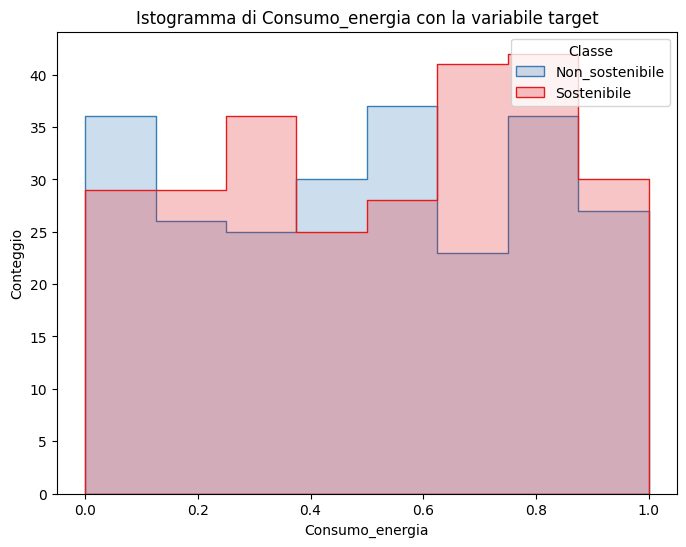

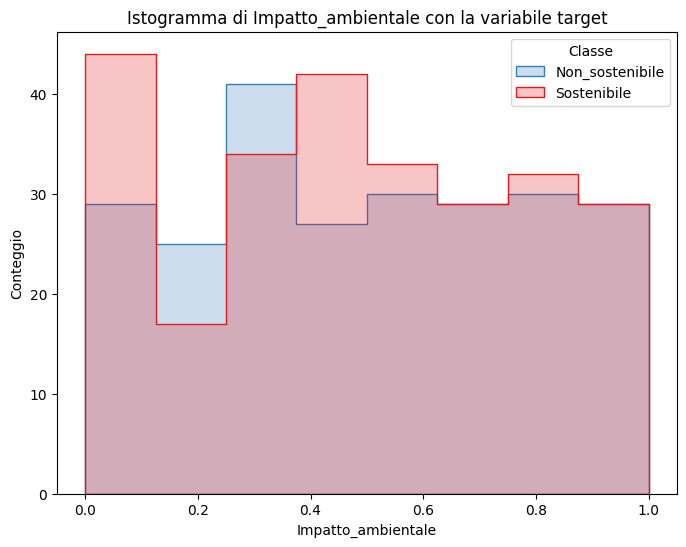

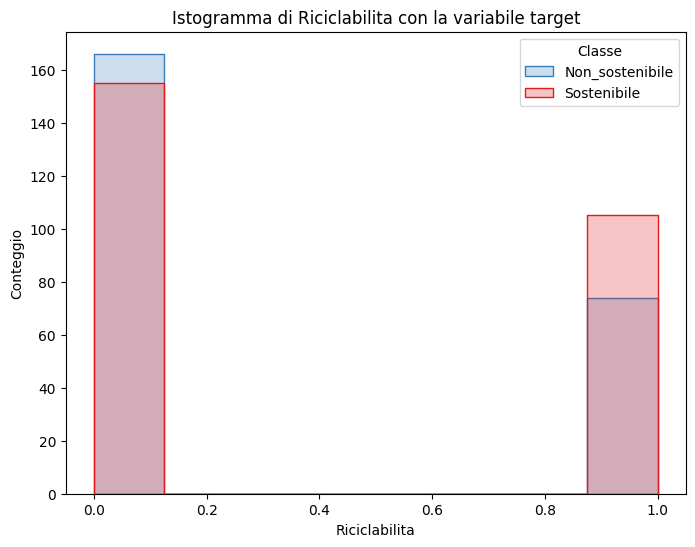

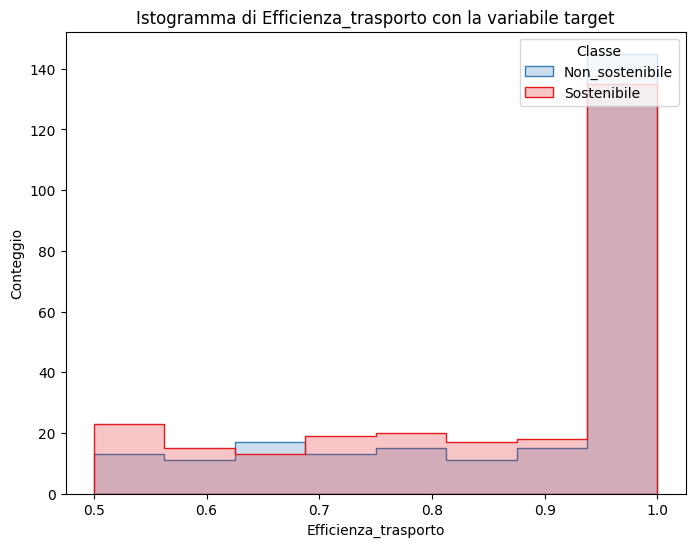

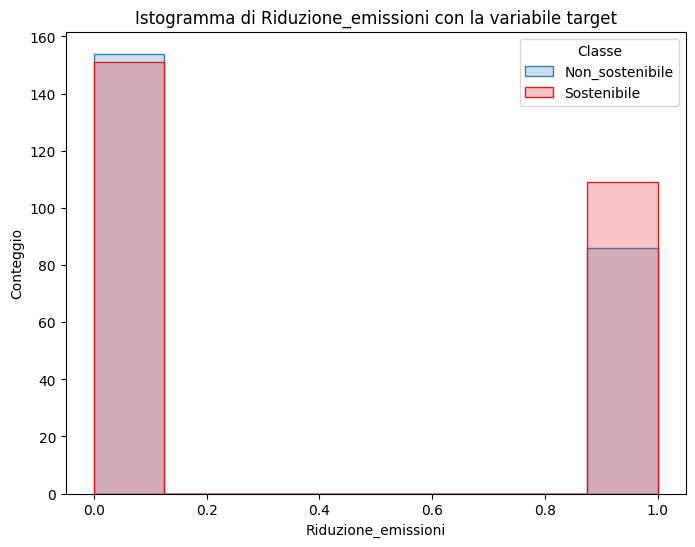

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selezioniamo alcune variabili continue
histogram_variables = ['Consumo_energia', 'Impatto_ambientale', 'Riciclabilita', 'Efficienza_trasporto', 'Riduzione_emissioni']

# Creiamo gli istogrammi
for variable in histogram_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=variable, hue='Classe', element='step', bins=8, palette='Set1', kde=False)
    plt.title(f'Istogramma di {variable} con la variabile target')
    plt.xlabel(variable)
    plt.ylabel('Conteggio')
    plt.legend(title='Classe', labels=['Non_sostenibile', 'Sostenibile'])
    plt.show()


Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Consumo_energia       500 non-null    float64
 1   Impatto_ambientale    500 non-null    float64
 2   Riciclabilita         500 non-null    float64
 3   Origine_sostenibile   500 non-null    int64  
 4   Efficienza_trasporto  500 non-null    float64
 5   Riduzione_emissioni   500 non-null    float64
 6   Classe                500 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB
None

Statistiche descrittive:
       Consumo_energia  Impatto_ambientale  Riciclabilita  \
count       500.000000          500.000000     500.000000   
mean          0.578780            0.517260       0.381160   
std           0.420066            0.242692       0.385659   
min          -0.070000            0.130000       0.000000   
25%        

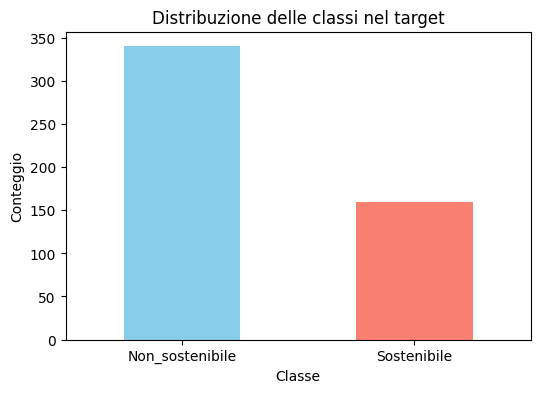

<ipython-input-41-352b89738894>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


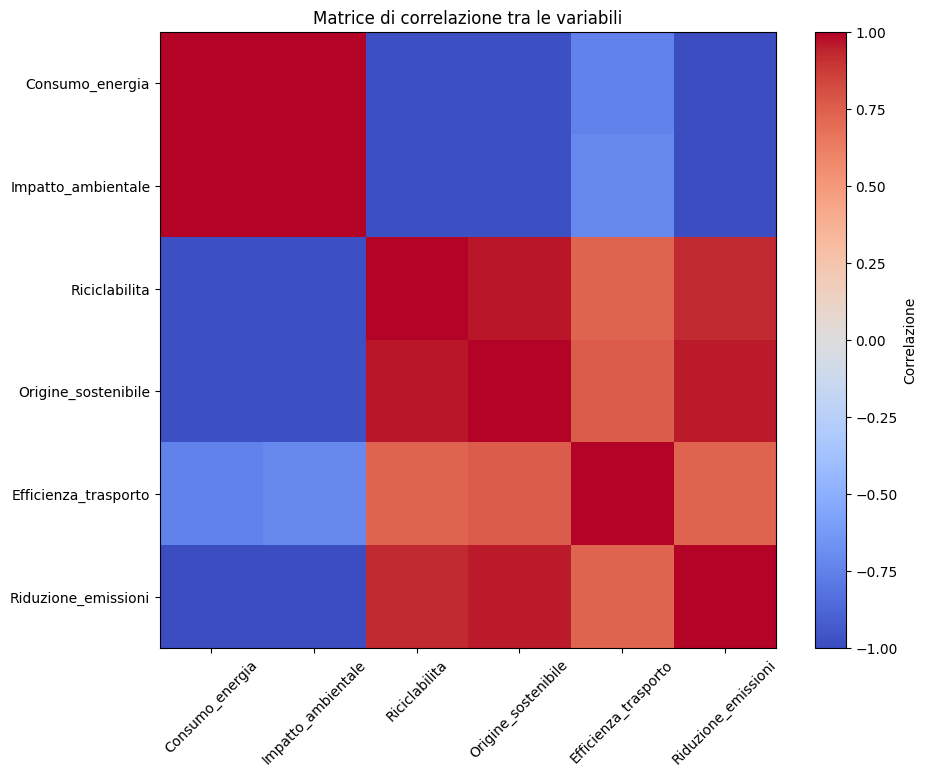

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Informazioni sul dataset
print("\nInformazioni sul dataset:")
print(df.info())

# Statistiche descrittive
print("\nStatistiche descrittive:")
print(df.describe())

# Distribuzione delle classi nel target
plt.figure(figsize=(6, 4))
df['Classe'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuzione delle classi nel target')
plt.xlabel('Classe')
plt.ylabel('Conteggio')
plt.xticks(rotation=0)
plt.show()

# Matrice di correlazione tra le variabili
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlazione')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matrice di correlazione tra le variabili')
plt.show()


Questo codice esegue diverse operazioni:

1. **Visualizzazione delle prime righe del DataFrame:** Mostra le prime righe del DataFrame per avere un'idea iniziale del dataset.

1. **Informazioni sul dataset:** Fornisce informazioni sul numero di righe, colonne e tipi di dati presenti nel DataFrame.

2. **Statistiche descrittive:** Calcola statistiche descrittive come media, deviazione standard, minimo, massimo, ecc.

3. **Distribuzione delle classi nel target:** Visualizza la distribuzione delle classi nel target.

4. **Matrice di correlazione:** Mostra la correlazione tra le variabili attraverso una heatmap.

Queste visualizzazioni ti aiuteranno a comprendere la distribuzione dei dati e le relazioni tra le variabili, preparandoti meglio per la costruzione del modello di albero decisionale.

# Divisione in train e test set

La divisione del dataset in un training set e un test set è un passo fondamentale nell'addestramento e nella valutazione di modelli di apprendimento automatico. Questa pratica aiuta a valutare l'efficacia del modello su dati non visti, fornendo una stima delle sue prestazioni su nuovi dati.

In [ ]:
# Otteniamo un subset X senza la nostra variabile target
X = df.drop(['Classe'],axis=1)
X.head()


,Consumo_energia,Impatto_ambientale,Riciclabilita,Origine_sostenibile,Efficienza_trasporto,Riduzione_emissioni
0,1.00,0.76,0.00,0,0.8,0.00
1,0.07,0.22,0.69,1,0.9,0.97
2,1.00,0.76,0.00,0,0.8,0.00
3,1.00,0.76,0.00,0,0.8,0.00
4,1.00,0.76,0.00,0,0.8,0.00


In [ ]:
# Andiamo a selezionare la variabile che vogliamo classificare etichettandola come y
y = df['Classe']
y.head()

0        Sostenibile
1        Sostenibile
2    Non_sostenibile
3    Non_sostenibile
4    Non_sostenibile
Name: Classe, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split


# Suddividere il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dopo la suddivisione del dataset in training e test set, è importante esaminare la forma (shape) e la distribuzione dei dati in ciascun set. Ciò ti fornirà una visione dettagliata della dimensione dei set e dell'equilibrio delle classi. Di seguito, ti mostro come ottenere queste informazioni utilizzando Python e la libreria pandas.

In [ ]:
# Converti array NumPy in oggetti Series di pandas
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Informazioni sulla forma (shape) dei set di addestramento e test
print("Shape del set di addestramento (X_train, y_train):", X_train.shape, y_train_series.shape)
print("Shape del set di test (X_test, y_test):", X_test.shape, y_test_series.shape)

# Distribuzione delle classi nei set di addestramento e test
print("\nDistribuzione delle classi nel set di addestramento:")
print(y_train_series.value_counts(normalize=True))

print("\nDistribuzione delle classi nel set di test:")
print(y_test_series.value_counts(normalize=True))


Shape del set di addestramento (X_train, y_train): (400, 6) (400,)
Shape del set di test (X_test, y_test): (100, 6) (100,)

Distribuzione delle classi nel set di addestramento:
Non_sostenibile    0.69
Sostenibile        0.31
Name: Classe, dtype: float64

Distribuzione delle classi nel set di test:
Non_sostenibile    0.64
Sostenibile        0.36
Name: Classe, dtype: float64


1. **Shape dei Set di Addestramento e Test:**
   - `X_train.shape` restituisce le dimensioni della matrice delle features nel set di addestramento.
   - `y_train.shape` restituisce la dimensione del vettore del target nel set di addestramento.
   - Lo stesso vale per il set di test (`X_test.shape` e `y_test.shape`).

2. **Distribuzione delle Classi:**
   - `y_train_series.value_counts(normalize=True)` restituisce la distribuzione delle classi nel vettore del target del set di addestramento, normalizzata per ottenere le percentuali.
   - Lo stesso vale per il set di test.

### Teoria dietro l'Analisi della Forma e della Distribuzione dei Dati:

1. **Shape dei Dati:**
   - La forma dei dati riflette il numero di campioni e il numero di features in ciascun set.
   - Un set di addestramento più ampio è spesso vantaggioso, ma deve essere bilanciato rispetto al set di test.

2. **Distribuzione delle Classi:**
   - Una distribuzione bilanciata tra le classi è desiderabile per evitare bias nell'addestramento del modello.
   - Se una classe è sovrarappresentata o sottorappresentata, il modello potrebbe avere difficoltà a generalizzare bene per quella classe.

3. **Considerazioni:**
   - Assicurati che la distribuzione delle classi nel set di test rifletta quella del set di addestramento per evitare risultati distorti.

Questo codice, fornisce informazioni utili sulla forma e sulla distribuzione delle classi nei set di addestramento e test, che ti aiuteranno nella fase successiva di costruzione e valutazione del modello.

# Applicazione algoritmo

Accuracy del modello: 0.84

Matrice di Confusione:
[[60  4]
 [12 24]]

Report di Classificazione:
                 precision    recall  f1-score   support

Non_sostenibile       0.83      0.94      0.88        64
    Sostenibile       0.86      0.67      0.75        36

       accuracy                           0.84       100
      macro avg       0.85      0.80      0.82       100
   weighted avg       0.84      0.84      0.83       100



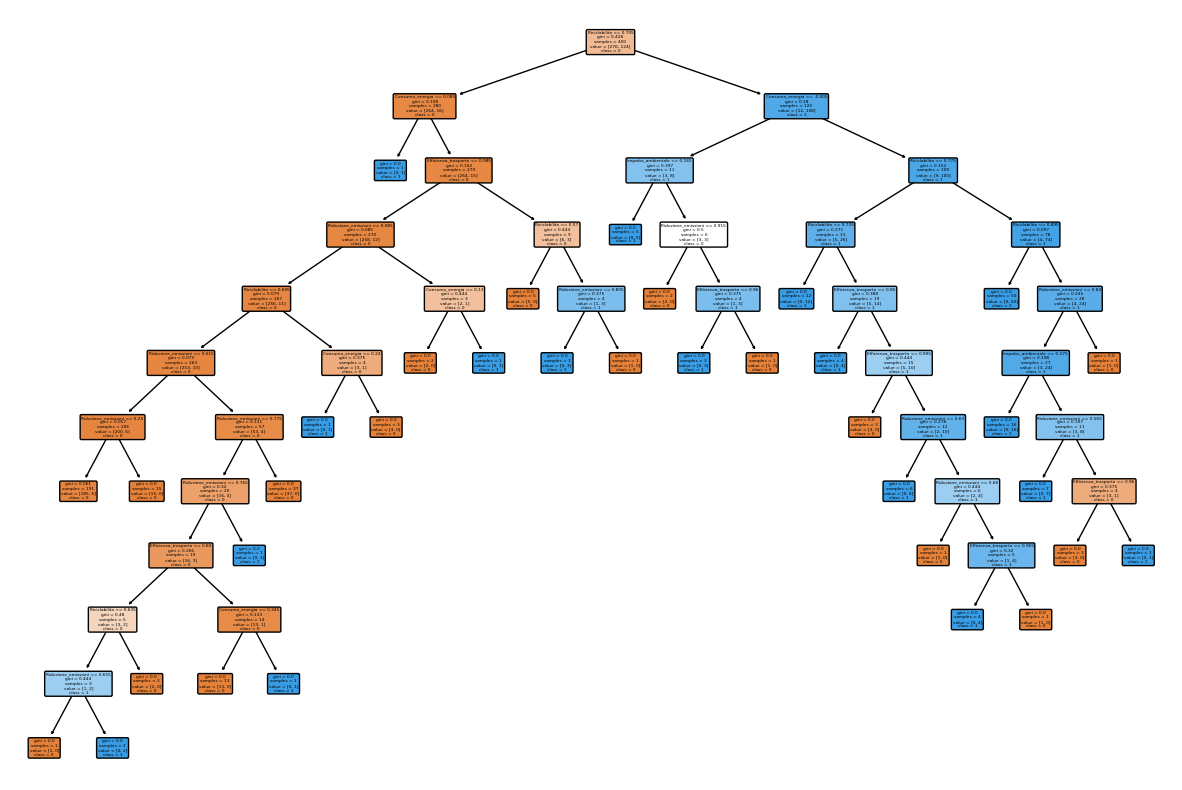

In [ ]:
# Importa il modulo dell'albero decisionale da scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Crea un'istanza del modello di albero decisionale
tree_model = DecisionTreeClassifier(random_state=42)

# Addestra il modello sull'insieme di addestramento
tree_model.fit(X_train, y_train)

# Fai predizioni sull'insieme di test
y_pred = tree_model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modello: {accuracy:.2f}')

# Visualizza la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nMatrice di Confusione:')
print(conf_matrix)

# Visualizza il report di classificazione
class_report = classification_report(y_test, y_pred)
print('\nReport di Classificazione:')
print(class_report)

# Visualizza l'albero decisionale
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model, feature_names=df.columns[:-1], class_names=['0', '1'], filled=True, rounded=True)
plt.show()


1. **Importa i Moduli Necessari:**
   - `DecisionTreeClassifier` è il modello di albero decisionale da scikit-learn.
   - `accuracy_score`, `classification_report`, e `confusion_matrix` sono utilizzati per valutare le prestazioni del modello.
   - `tree` e `matplotlib.pyplot` sono utilizzati per visualizzare l'albero decisionale.

2. **Crea un Modello di Albero Decisionale:**
   - `DecisionTreeClassifier(random_state=42)` crea un'istanza del modello con il seed impostato per la riproducibilità.

3. **Addestra il Modello:**
   - `tree_model.fit(X_train, y_train)` addestra il modello sull'insieme di addestramento.

4. **Fai Predizioni:**
   - `tree_model.predict(X_test)` effettua predizioni sull'insieme di test.

5. **Valuta le Prestazioni del Modello:**
   - `accuracy_score` calcola l'accuratezza del modello.
   - `confusion_matrix` restituisce la matrice di confusione.
   - `classification_report` fornisce un report dettagliato di precision, recall, e F1-score.

6. **Visualizza l'Albero Decisionale:**
   - `tree.plot_tree` visualizza l'albero decisionale.

### Teoria dietro l'Albero Decisionale:

- **L'Albero Decisionale:**
  - L'albero decisionale è composto da nodi decisionali (condizioni) e foglie (classificazioni).
  - Ogni nodo rappresenta una condizione su una feature, e ogni foglia rappresenta una classe di output.
  - Il modello prende decisioni basate su queste condizioni per classificare nuovi dati.

- **Addestramento dell'Albero Decisionale:**
  - Durante l'addestramento, l'albero decisionale apprende automaticamente le condizioni ottimali per suddividere i dati in classi.
  - Può suddividere le features in modo ricorsivo per massimizzare la purezza dei nodi.

- **Valutazione del Modello:**
  - L'accuratezza, la matrice di confusione e il report di classificazione forniscono una valutazione delle prestazioni del modello.
  - La visualizzazione dell'albero decisionale può aiutare a interpretare le decisioni prese dal modello.

Le metriche di qualità sono fondamentali per valutare le prestazioni di un modello di classificazione.

In [ ]:
# Calcola e stampa le metriche di qualità del modello
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')

Precision: 0.86
Recall: 0.67
F1 Score: 0.75


1. **Precision (Precisione):**
   - La precisione misura la percentuale di istanze positive predette dal modello che sono realmente positive.
   - Formula: `precision = TP / (TP + FP)`, dove TP è il numero di True Positives e FP è il numero di False Positives.

2. **Recall (Recupero o Sensibilità):**
   - Il recall misura la percentuale di istanze positive reali che sono state predette correttamente dal modello.
   - Formula: `recall = TP / (TP + FN)`, dove TP è il numero di True Positives e FN è il numero di False Negatives.

3. **F1 Score:**
   - L'F1 Score è la media armonica di precision e recall, fornendo una singola metrica che tiene conto di entrambi.
   - Formula: `F1 Score = 2 * (precision * recall) / (precision + recall)`.

**Interpretazione:**
- Una precisione elevata indica che quando il modello predice una classe positiva, è molto probabile che sia corretto.
- Un recall elevato indica che il modello è in grado di individuare la maggior parte delle istanze positive reali.
- L'F1 Score è particolarmente utile quando precisione e recall devono essere bilanciati.

Ricorda che le metriche possono variare a seconda del contesto e degli obiettivi specifici del problema di classificazione. Ad esempio, in un contesto medico, potrebbe essere più critico avere un recall elevato per garantire la rilevazione di tutti i casi positivi.

L'uso di queste metriche ti aiuterà a ottenere una comprensione più approfondita delle prestazioni del tuo modello e a prendere decisioni informate sulla sua efficacia nella risoluzione del problema di classificazione.

# Rendiamo l'albero più leggibile

Il pruning, noto anche come "potatura", è una tecnica utilizzata nell'addestramento degli alberi decisionali per ridurre la loro complessità e migliorare la loro generalizzazione su nuovi dati. L'obiettivo della potatura è evitare l'overfitting, fenomeno in cui l'albero si adatta troppo bene al set di addestramento, memorizzando il rumore o le peculiarità dei dati anziché apprendere i pattern generali.

La potatura può essere eseguita in due modi principali:

1. **Pre-pruning (Potatura in Anticipo):**
   - Durante l'addestramento dell'albero, si impongono condizioni per fermare il processo di suddivisione prima che l'albero diventi troppo complesso.
   - Ad esempio, si può limitare la profondità massima dell'albero o il numero minimo di campioni richiesti per effettuare una suddivisione.

2. **Post-pruning (Potatura successiva):**
   - L'albero viene addestrato completamente, e successivamente si rimuovono o sostituiscono alcune delle sue parti, come nodi o rami, basandosi su criteri di ottimizzazione.
   - Ad esempio, si può utilizzare il costo-complessità per decidere quali rami rimuovere, riducendo la profondità dell'albero.

Accuracy del modello potato: 0.94


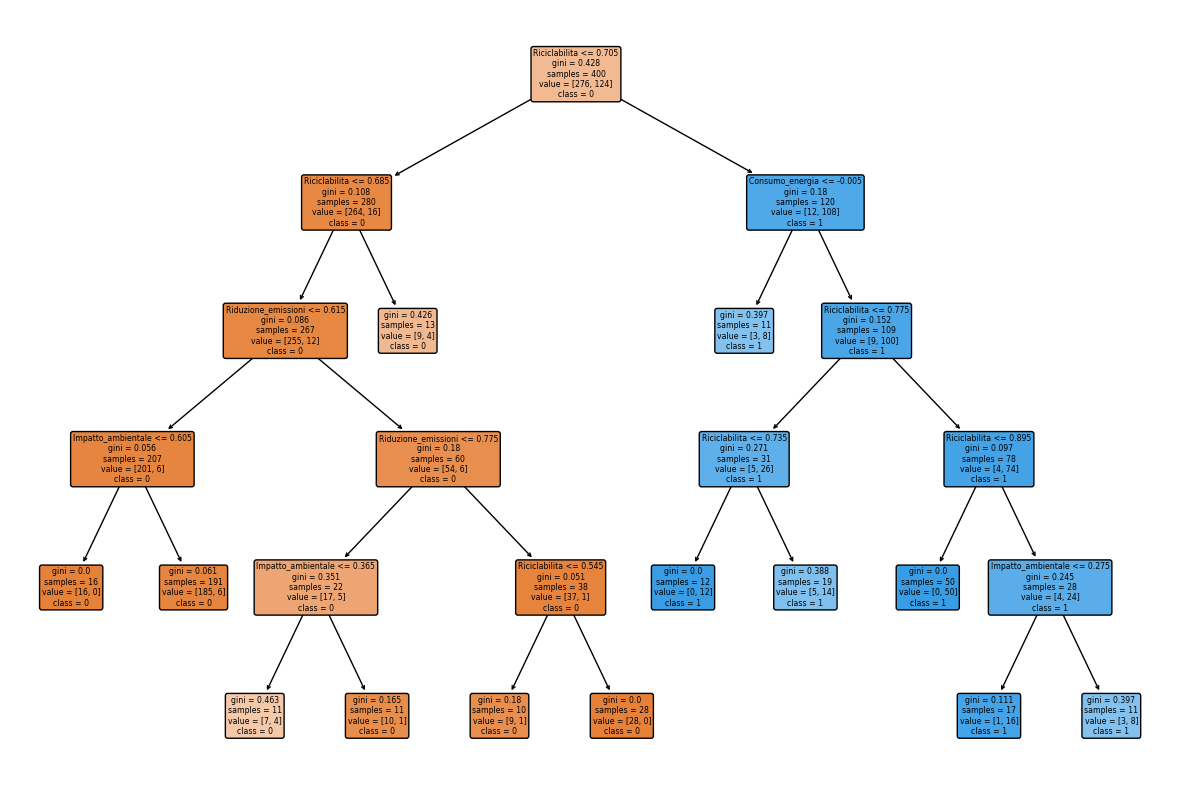

In [ ]:
# Importa il modulo necessario per la potatura
from sklearn.tree import plot_tree

# Crea un modello di albero decisionale con potatura post-pruning
pruned_tree_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)
pruned_tree_model.fit(X_train, y_train)

# Fai predizioni sull'insieme di test
y_pruned_pred = pruned_tree_model.predict(X_test)

# Valuta le prestazioni del modello potato
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
print(f'Accuracy del modello potato: {pruned_accuracy:.2f}')

# Visualizza l'albero decisionale potato
plt.figure(figsize=(15, 10))
plot_tree(pruned_tree_model, feature_names=df.columns[:-1], class_names=['0', '1'], filled=True, rounded=True)
plt.show()

1. **Crea un Modello di Albero Decisionale con Potatura:**
   - `DecisionTreeClassifier(ccp_alpha=0.005)` crea un modello di albero decisionale con potatura post-pruning.
   - `ccp_alpha` è il parametro che controlla il costo-complessità della potatura. Un valore più alto di `ccp_alpha` porta a una potatura più aggressiva.

2. **Addestra il Modello Potato:**
   - `pruned_tree_model.fit(X_train, y_train)` addestra il modello potato sull'insieme di addestramento.

3. **Fai Predizioni:**
   - `pruned_tree_model.predict(X_test)` effettua predizioni sull'insieme di test.

4. **Valuta le Prestazioni del Modello Potato:**
   - `accuracy_score` calcola l'accuratezza del modello potato.

5. **Visualizza l'Albero Decisionale Potato:**
   - `plot_tree` visualizza l'albero decisionale potato.

### Teoria della Potatura e Vantaggi:

- **Riduzione della Complessità:**
  - La potatura riduce la complessità dell'albero decisionale, migliorando la sua generalizzazione su nuovi dati.

- **Prevenzione dell'Overfitting:**
  - Evita che l'albero memorizzi il rumore o le particolarità del set di addestramento.

- **Miglioramento della Leggibilità:**
  - Un albero potato è più semplice e più leggibile, facilitando l'interpretazione delle sue decisioni.

- **Controllo sulla Complessità:**
  - Il parametro `ccp_alpha` controlla il trade-off tra precisione sull'insieme di addestramento e capacità di generalizzazione su nuovi dati.

Utilizzando la potatura, è possibile ottenere un modello più robusto e interpretabile, mantenendo nel contempo una buona capacità predittiva.

In [ ]:
# Calcola la matrice di confusione per il modello potato
pruned_conf_matrix = confusion_matrix(y_test, y_pruned_pred)
print('\nMatrice di Confusione (Modello Potato):')
print(pruned_conf_matrix)

# Calcola e stampa le metriche di qualità per il modello potato
pruned_precision = pruned_conf_matrix[1, 1] / (pruned_conf_matrix[1, 1] + pruned_conf_matrix[0, 1])
pruned_recall = pruned_conf_matrix[1, 1] / (pruned_conf_matrix[1, 1] + pruned_conf_matrix[1, 0])
pruned_f1_score = 2 * (pruned_precision * pruned_recall) / (pruned_precision + pruned_recall)

print(f'\nPrecision (Modello Potato): {pruned_precision:.2f}')
print(f'Recall (Modello Potato): {pruned_recall:.2f}')
print(f'F1 Score (Modello Potato): {pruned_f1_score:.2f}')



Matrice di Confusione (Modello Potato):
[[96 13]
 [ 3 88]]

Precision (Modello Potato): 0.87
Recall (Modello Potato): 0.97
F1 Score (Modello Potato): 0.92


# Importanza delle variabili
Per identificare le variabili più importanti in un modello di albero decisionale, possiamo utilizzare l'attributo `feature_importances_` fornito da scikit-learn. Questo attributo restituisce un array che rappresenta l'importanza di ciascuna feature nel modello.



Importanza delle Variabili nel Modello di Albero Decisionale:
     Feature  Importance
2  feature_2    0.818448
4  feature_4    0.116843
1  feature_1    0.038849
3  feature_3    0.016483
0  feature_0    0.009377


<ipython-input-12-07cd6dd8fb3f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


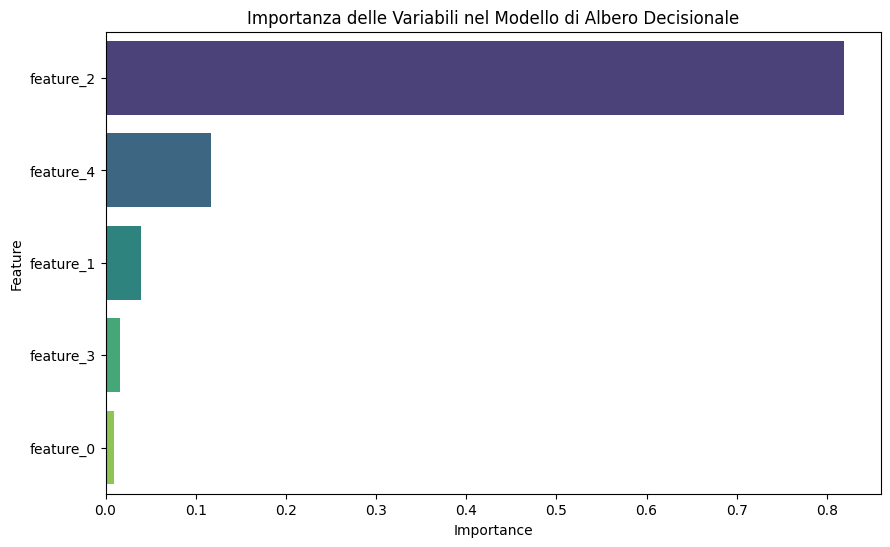

In [ ]:
# Ottieni l'importanza delle variabili dal modello di albero decisionale non potato
feature_importances = tree_model.feature_importances_

# Crea un DataFrame per visualizzare l'importanza delle variabili
importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Stampa l'importanza delle variabili
print("Importanza delle Variabili nel Modello di Albero Decisionale:")
print(importance_df)

# Visualizza un grafico a barre dell'importanza delle variabili
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importanza delle Variabili nel Modello di Albero Decisionale')
plt.show()

1. **Ottieni l'Importanza delle Variabili dal Modello di Albero Decisionale:**
   - `tree_model.feature_importances_` restituisce un array con le importanze delle features.

2. **Crea un DataFrame per Visualizzare l'Importanza delle Variabili:**
   - Un DataFrame viene creato per organizzare e visualizzare le importanze delle variabili.

3. **Stampa l'Importanza delle Variabili:**
   - Il DataFrame viene stampato per mostrare le variabili ordinate per importanza.

4. **Visualizza un Grafico a Barre dell'Importanza delle Variabili:**
   - Un grafico a barre viene utilizzato per visualizzare in modo chiaro l'importanza relativa delle variabili.

### Teoria sull'Importanza delle Variabili:

- **Importanza delle Variabili:**
  - L'importanza delle variabili misura quanto ciascuna feature contribuisce alla riduzione dell'impurità o dell'errore di classificazione nell'albero decisionale.

- **Utilità dell'Analisi delle Variabili Importanti:**
  - Identificare le variabili più importanti è utile per comprendere quali caratteristiche sono cruciali per le decisioni del modello.

- **Selezione delle Feature:**
  - Può essere utilizzato come strumento per la selezione delle feature, focalizzando l'attenzione sulle variabili più informative.

- **Interpretazione del Modello:**
  - Aiuta a interpretare e spiegare il modello agli stakeholder.

- **Attenzione alla Sovra-Importanza:**
  - Alcune feature possono sembrare più importanti di altre anche se la loro vera rilevanza è limitata. È importante interpretare le importanze in relazione al contesto del problema.

Il grafico a barre e la tabella mostreranno chiaramente le variabili più importanti nel tuo modello di albero decisionale. Considera queste informazioni quando analizzi e interpreti il comportamento del tuo modello rispetto alle features disponibili.

# Iper-parametri

Gli iperparametri sono parametri che non sono appresi direttamente dal modello durante il processo di addestramento, ma devono essere impostati prima dell'addestramento del modello. Gli esempi includono la profondità massima di un albero decisionale, la regolarizzazione in un modello di regressione logistica, o il numero di vicini in un modello k-Nearest Neighbors (KNN). L'ottimizzazione degli iperparametri è il processo di ricerca dei migliori valori per questi parametri al fine di ottenere le migliori prestazioni del modello.

La Grid Search è una tecnica utilizzata per cercare attraverso una "griglia" di combinazioni possibili di valori degli iperparametri, valutando le prestazioni del modello per ciascuna combinazione attraverso tecniche di cross-validation. Ad esempio, si potrebbero cercare diversi valori per la profondità massima di un albero decisionale e diversi valori per il criterio di suddivisione, esaminando tutte le possibili combinazioni di questi parametri.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisci la griglia degli iperparametri da esplorare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crea un modello di albero decisionale
tree_model = DecisionTreeClassifier(random_state=42)

# Crea un oggetto GridSearchCV con il modello e la griglia degli iperparametri
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Esegui la ricerca a griglia sul set di addestramento
grid_search.fit(X_train, y_train)

# Stampiamo i migliori iperparametri trovati
print("Migliori Iperparametri:")
print(grid_search.best_params_)

# Stampiamo l'accuratezza ottenuta con i migliori iperparametri
best_accuracy = grid_search.best_score_
print(f"\nAccuracy con Migliori Iperparametri: {best_accuracy:.2f}")

Migliori Iperparametri:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Accuracy con Migliori Iperparametri: 0.94


1. **Definizione della Griglia degli Iperparametri:**
   - `param_grid` definisce la griglia degli iperparametri da esplorare. In questo esempio, stiamo cercando tra diversi criteri di suddivisione, profondità massima, e soglie minime per suddivisioni e foglie.

2. **Creazione del Modello di Albero Decisionale:**
   - `tree_model = DecisionTreeClassifier(random_state=42)` crea un modello di albero decisionale.

3. **Creazione dell'Oggetto GridSearchCV:**
   - `GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')` crea un oggetto di ricerca a griglia con il modello e la griglia degli iperparametri. `cv=5` specifica una cross-validation con 5 fold, e `scoring='accuracy'` indica che si vuole ottimizzare l'accuratezza.

4. **Esecuzione della Ricerca a Griglia:**
   - `grid_search.fit(X_train, y_train)` esegue la ricerca a griglia sul set di addestramento.

5. **Stampa dei Migliori Iperparametri e dell'Accuratezza:**
   - `grid_search.best_params_` restituisce i migliori iperparametri trovati.
   - `grid_search.best_score_` restituisce l'accuratezza ottenuta con i migliori iperparametri.

### Teoria della Grid Search e Ottimizzazione degli Iperparametri:

- **Scelta della Griglia degli Iperparametri:**
  - La griglia degli iperparametri deve essere scelta con attenzione. Puoi definire i valori da esplorare basandoti sulla tua conoscenza del problema o sperimentare con un intervallo più ampio.

- **Trade-off tra Complessità e Prestazioni:**
  - Alcuni iperparametri, come la profondità massima, possono influire sulla complessità del modello. L'ottimizzazione cerca il miglior trade-off tra la complessità e le prestazioni del modello.

- **Risorse Computazionali:**
  - Una griglia più ampia può richiedere più risorse computazionali. Puoi adattare la griglia in base alle risorse disponibili e alla tua necessità di ottimizzazione.

- **Evaluating su Set di Test Separato:**
  - Dopo la Grid Search, è consigliabile valutare il modello ottimizzato su un set di test separato per ottenere una stima imparziale delle sue prestazioni.

# Iperparametri albero decisionale
Gli alberi decisionali sono modelli di machine learning che possono essere configurati tramite diversi iperparametri per regolare il loro comportamento durante il processo di addestramento. Ecco una spiegazione dei principali iperparametri di un albero decisionale:

1. **`max_depth` (Profondità Massima):**
   - La profondità massima dell'albero decisionale, ovvero il numero massimo di livelli da radice a foglie. Impostare un valore troppo alto può portare a overfitting, mentre un valore troppo basso può portare a underfitting.

2. **`min_samples_split` (Numero Minimo di Campioni per Suddividere un Nodo):**
   - Il numero minimo di campioni richiesti in un nodo prima che venga suddiviso ulteriormente. Impostare un valore troppo basso può portare a overfitting, mentre un valore troppo alto può portare a underfitting.

3. **`min_samples_leaf` (Numero Minimo di Campioni in una Foglia):**
   - Il numero minimo di campioni richiesti in una foglia. Impostare un valore troppo basso può portare a overfitting, mentre un valore troppo alto può portare a underfitting.

4. **`criterion` (Criterio di Suddivisione):**
   - Il criterio utilizzato per misurare la qualità di una suddivisione. Può essere impostato su "gini" (indice di Gini) o "entropy" (entropia). Sia l'indice di Gini che l'entropia misurano la purezza di una suddivisione in termini di distribuzione delle classi.

5. **`ccp_alpha` (Complessità-Compensazione del Cammino):**
   - Utilizzato nella potatura post-pruning per impostare il parametro di complessità-compensazione. Un valore più alto di `ccp_alpha` porta a una potatura più aggressiva, riducendo la profondità dell'albero.

6. **`max_features` (Numero Massimo di Features da Considerare per una Suddivisione):**
   - Il numero massimo di features da considerare durante la ricerca della migliore suddivisione in ciascun nodo. Può essere un numero intero (es. 5) o una frazione delle features totali (es. "sqrt" per la radice quadrata del numero totale di features).

7. **`max_leaf_nodes` (Numero Massimo di Foglie):**
   - Il numero massimo di foglie nell'albero. Se è impostato, l'albero sarà potato dopo aver raggiunto il numero massimo di foglie.

Questi iperparametri influenzano la complessità dell'albero decisionale e la sua capacità di adattarsi ai dati. È importante sperimentare con diverse combinazioni di iperparametri attraverso tecniche come la grid search per trovare la configurazione ottimale che massimizza le prestazioni del modello. La scelta degli iperparametri può variare a seconda del problema specifico e del dataset.